<p><img alt="Scikit-learn logo" height="45px" src="https://raw.githubusercontent.com/KHSDTC/Hackathon_Autumn2020_Challenge/master/day2notebooks/figures/scikit-learn-logo-small.png" align="left" hspace="10px" vspace="0px"></p>

<h1>Introduction to Machine Learning with Scikit-learn</h1>


## **Getting started**

Many Python libraries provide reliable implementations of machine learning algorithms. One of the most popular is Scikit-learn (https://scikit-learn.org/stable/index.html), an open-source package that provides efficient implementations of a large number of machine learning methods and algorithms. 

Scikit-learn is characterized by a clean API, as well as by handy and complete online documentation. A benefit of this uniform API is that once you understand the basic use and syntax for one type of model, switching to a new model is pretty straightforward. 

A guide illustrating some of the Scikit-learn main features can be found [here](https://scikit-learn.org/stable/getting_started.html).

In this tutorial, we will learn how to use Scikit-learn to perform a very basic machine learning task involving supervised learning. Let's start!

---


# Importing Python libraries
As we saw in the Python course, it is a good practice first to import all the Python libraries that we are going to use in the script.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC

# Download dataset

Now, let's download and have a quick look at the data we will use.


In [2]:
dataset_url = 'https://raw.githubusercontent.com/KHSDTC/Hackathon_Autumn2020_Challenge/master/day2notebooks/dataset.csv'
dataset = pd.read_csv(dataset_url)
print(dataset)

     washing hands  touching face  outcome
0         8.862434      15.637931      ill
1        10.422334      15.404222      ill
2        12.462217      27.923875      ill
3        12.242321      25.734998      ill
4        12.511457      18.840600      ill
..             ...            ...      ...
195      14.613281      18.484341  healthy
196      17.811169      22.817188  healthy
197      16.425944      13.559383  healthy
198      20.922666      23.578661  healthy
199      14.923250      12.524323  healthy

[200 rows x 3 columns]


In our dataset, we have data from about 200 people telling:

*   The mean time spent washing their hands;
*   The mean number of times that they touched their face per hour;
*   And if they got a virus in the following 2 months.

Based on this data, we want to develop a model that would perform predictions in new data. To accomplish this, we will use the **machine learning workflow**.

# **Machine learning workflow**
For this tutorial, we will use the workflow presented during the theory presentation.



<center><img src="https://raw.githubusercontent.com/KHSDTC/Hackathon_Autumn2020_Challenge/master/day2notebooks/figures/workflow.png" width="600"></center>



The machine learning workflow tries to give us a recipe to follow when working with a machine learning project. The first step is to perform the **problem formulation**.

## <p><img alt="Scikit-learn logo" height="45px" src="https://raw.githubusercontent.com/KHSDTC/Hackathon_Autumn2020_Challenge/master/day2notebooks/figures/problem.png" align="left" hspace="10px" vspace="0px"></p> **Problem formulation**

First, we need to frame our machine learning problem. In this step, we need to define the features that we will use, the target variable or label that we want to predict, and finally, the machine learning task.

Give a try to create a straight forward sentence presenting our project scope by yourselves. When you are done, check our example of the framing below.



### Answer

> *Given how often people touch their own faces and how long they wash their hands, predict if they get ill in the next 2 months.*

*   Task: Classification
*   Features: Washing hand time and how many times touch the face
*   Target: Outcome in the next 2 months  


For convenience, let's store our features and targets in lists to use later.

In [3]:
features = ['washing hands', 'touching face']
targets = ['outcome']

Remember, framing your scope concisely and comprehensively is very important to guarantee that everyone involved in your project understands your goals.
For more information about this step, please, check this [material](https://developers.google.com/machine-learning/problem-framing).

## <p><img alt="Scikit-learn logo" height="45px" src="https://raw.githubusercontent.com/KHSDTC/Hackathon_Autumn2020_Challenge/master/day2notebooks/figures/data.png" align="left" hspace="10px" vspace="0px"></p>  **Data preparation**

In this step, we perform most of the exploratory data analyses and deal with the data's inconsistencies. As we saw in the previous course, Pandas is an excellent tool to perform this step when working with tabular data.

In our case, our dataset is already cleaned and validated for our task. Let's check how it looks like!


In [4]:
dataset.describe()

,washing hands,touching face
count,200.000000,200.000000
mean,13.274992,20.027614
std,4.638437,5.068508
min,0.723925,9.244582
25%,9.970063,15.918943
50%,13.904335,20.253768
75%,16.087032,23.530735
max,24.073835,35.996035


To have more flexibility to plot some graphs, we opt to use the data in the Numpy array format. [NumPy](https://numpy.org/) is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

An introduction to Numpy is out of the scope of today's notebook. If you want to get a better understanding of this library capabilities, please check out this [Quickstart Tutorial](https://numpy.org/devdocs/user/quickstart.html).

Back to our project, in order to extract the Numpy arrays from a Pandas Dataframe, we used the ".values" call.

In [5]:
X = dataset[features].values
y = dataset[targets].values

By using this format, we have the following feature matrix and target vector.

![alt text](https://raw.githubusercontent.com/KHSDTC/Hackathon_Autumn2020_Challenge/master/day2notebooks/figures/features_targets.png)


In [6]:
print(f'Features type: {type(X)}')
print(f'Target type: {type(y)}')

print(f'Features dimensions: {X.shape}')
print(f'Target dimensions: {y.shape}')

Features type: <class 'numpy.ndarray'>
Target type: <class 'numpy.ndarray'>
Features dimensions: (200, 2)
Target dimensions: (200, 1)



Besides Numpy, the [Matplotlib](https://matplotlib.org/) library is also an excellent tool that allows the creation of different figures and plots. This visualisation tool is handy to get a better insight into how the features and labels are related. For a great guide about this tool, please check out [this material](https://realpython.com/python-matplotlib-guide/).

So let's try to visualise how our features are distributed.


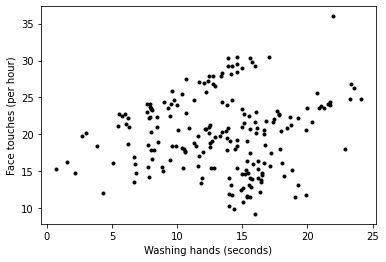

In [7]:
plt.scatter(X[:, 0], X[:, 1], marker='.', color='black')
plt.xlabel('Washing hands (seconds)')
plt.ylabel('Face touches (per hour)')
plt.show()

Since we are trying to perform classification, let's have a look at how the different categories are scattered in our plot.

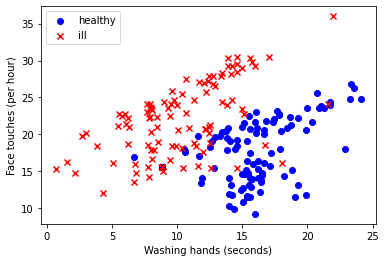

In [8]:
healthy_index = np.where(y=='healthy')
ill_index = np.where(y=='ill')

plt.scatter(X[healthy_index, 0], X[healthy_index, 1], marker='o', color='blue', label='healthy')
plt.scatter(X[ill_index, 0], X[ill_index, 1], marker='x', color='red', label='ill')
plt.xlabel('Washing hands (seconds)')
plt.ylabel('Face touches (per hour)')
plt.legend()
plt.show()

### **Splitting Your Data**
In the presentation, we introduced the idea of dividing your data set into two subsets:

*   Training set — a subset to train our model.
*   Test set — a subset to test our trained model.

The creation of a test set is essential to have an idea of how your machine learning solution will perform in unseen data.

In order to get an unbiased measure, we must **never train on test data**. If you see surprisingly good results on your evaluation metrics, it might be a sign that you are accidentally training on the test set. For example, high accuracy might indicate that test data has leaked into the training set. So please, double-check it.

Fortunately, Scikit-learn provided us with a very handful function to divide our original dataset. Let's try it!

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**NOTE**: Before continue, please, check out the **Scikit-learn documentation** about the train_test_split() function in this [link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). As a programmer, a crucial skill is to know where you can find out about how to implement what you want. Some great tools to help at this point is **Google** and the **Python library documentation** that you are working with! So let's get familiar with them! ^^


A machine learning project is characterised by a very iterative process. There are several combinations of transformations and models that can be used to perform our task. In order to evaluate these different choices to then apply the best approach in the new unseen data (aka test set), we usually divide our training set again, into the validation set and training set. 

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

Finally, let's check the size of our new sets.

In [11]:
print(f'Training set size: {X_train.shape[0]}')
print(f'Validation set size: {X_val.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Training set size: 128
Validation set size: 32
Test set size: 40


There are other different ways to split your dataset. Some of them are very useful when you have a low number of samples or some confounding variables in your dataset. The aim of performing this step is to evaluate your machine learning models' results without the risk of having an undesired bias.

This division of the data and the evaluation process is called **cross-validation**.

For more information about cross-validation:

- https://developers.google.com/machine-learning/data-prep
- https://scikit-learn.org/stable/modules/cross_validation.html

## <p><img alt="Scikit-learn logo" height="45px" src="https://raw.githubusercontent.com/KHSDTC/Hackathon_Autumn2020_Challenge/master/day2notebooks/figures/feature_engineering.png" align="left" hspace="10px" vspace="0px"></p>   **Feature Engineering**

Feature engineering refers to transformations performed on the raw data to generate our features.

Dimensionality reduction, feature selection, and feature scaling/normalizing are a few of the transformation that can be applied transformations.

But keep in mind that feature engineering is not restricted to it. Usually, for each application domain, particular transformations could be applied to the raw data to facilitate the task for our machine learning model.



In our tutorial, we will **normalize/scale our data**.

As we saw before, the variable "Washing hands" have values in a range of 0.72 s to 24 s, and our variable "Face touches" is between 9 and 36.

The range of these two variables is not very different. Still, for some types of models, this difference might make the model perform not very well by making it to give more importance to the variable with the greater values.

To prevent this, usually, we normalize our variable to a common range. In our example, we will use a **min-max normalization** where we squash the values of the variables to a range of 0 and 1.

In [12]:
# First, we create an scaler object
scaler = MinMaxScaler()

# Using the method .fit, our scaler will learn statistics about our training set to perform the scaling.
scaler.fit(X_train)

# Finally, we scale our data
X_train_normalized = scaler.transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

# Note: Did you notice that we only used the training set to get the statistics for our scaler?

Depending on the scenario, this kind of transformation is not the most appropriate. For example, if you have outliers present in your dataset, this kind of transformation might cause some harm to the model's performance. For this reason, it might be necessary to try several different approaches to try to find a good one.

Let's check how our data looks like.

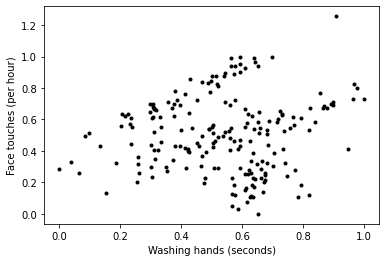

In [13]:
plt.scatter(X_train_normalized[:, 0], X_train_normalized[:, 1], marker='.', color='k')
plt.scatter(X_val_normalized[:, 0], X_val_normalized[:, 1], marker='.', color='k')
plt.scatter(X_test_normalized[:, 0], X_test_normalized[:, 1], marker='.', color='k')
plt.xlabel('Washing hands (seconds)')
plt.ylabel('Face touches (per hour)')
plt.show()

Note: there are some values outside the [0, 1] range. Any idea why?

## <p><img alt="Scikit-learn logo" height="45px" src="https://raw.githubusercontent.com/KHSDTC/Hackathon_Autumn2020_Challenge/master/day2notebooks/figures/training.png" align="left" hspace="10px" vspace="0px"></p>   **Training model**


Training a model means learning (determining) good values for all model's parameters from labelled examples. In supervised learning, a machine learning algorithm builds a model by examining many examples and attempting to find a model that minimizes loss.

Loss is the penalty for a bad prediction. That is, the loss is a number indicating how bad the model's prediction was on a single example. If the model's prediction is perfect, the loss is zero; otherwise, the loss is greater. The goal of training a model is to find a set of parameters that have low loss, on average, across all examples.

### **Choosing your model**

Often the hardest part of solving a machine learning problem can be finding the right estimator for the job.

Different estimators are better suited for different types of data and different problems.

Fortunately, Scikit-learn provided us with a cheat-sheet with some suggestions about which model to use on which occasion. Let's try it!


<a href="https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html">
<img src="https://scikit-learn.org/stable/_static/ml_map.png">
</a>
Source: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


In our case, we have about 200 samples, and we are performing a classification.

Then, the recommended model is [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html).

Before continue, please, check out its documentation to get familiar with the API and examples.

To start, let's create an instance of this model.


In [14]:
clf = LinearSVC(random_state=0)

Now, we can train our model on our training set using the method ".fit()". 



In [15]:
clf.fit(X_train_normalized, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

And that is it! We trained our machine learning model.

Let's make some predictions!

## <p><img alt="Scikit-learn logo" height="45px" src="https://raw.githubusercontent.com/KHSDTC/Hackathon_Autumn2020_Challenge/master/day2notebooks/figures/evaluation.png" align="left" hspace="10px" vspace="0px"></p>   **Model evaluation**

Fitting a model to some data does not entail that it will predict well on unseen data. This needs to be directly evaluated. We have just seen the train_test_split helper that splits a dataset into train, validation and test sets. Still, Scikit-learn provides many other tools for model evaluation, in particular for cross-validation.

Let's start making some predictions.

In [16]:
pred = clf.predict(X_val_normalized)

Now, let's check them.

In [17]:
print(pred)

['ill' 'ill' 'ill' 'healthy' 'ill' 'healthy' 'healthy' 'ill' 'healthy'
 'healthy' 'ill' 'ill' 'ill' 'ill' 'ill' 'ill' 'healthy' 'healthy' 'ill'
 'healthy' 'healthy' 'healthy' 'ill' 'ill' 'healthy' 'healthy' 'healthy'
 'healthy' 'ill' 'ill' 'healthy' 'healthy']


And now, let's check the ground truth!

In [18]:
print(y_val.flatten())

['ill' 'ill' 'ill' 'healthy' 'ill' 'healthy' 'healthy' 'healthy' 'healthy'
 'healthy' 'ill' 'ill' 'ill' 'ill' 'ill' 'ill' 'healthy' 'healthy' 'ill'
 'healthy' 'healthy' 'healthy' 'ill' 'ill' 'healthy' 'healthy' 'healthy'
 'healthy' 'ill' 'ill' 'healthy' 'healthy']


Since it is a lot of samples being predicted, let's summarise it into some performance metrics. The Scikit-Learn offer a wide number of options of metrics. They are specific for which machine learning task we are performing. In our case, we are developing a classifier, so a commonly used metric is the accuracy. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition:

$$\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$

You can check for other metrics from Scikit-learn [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

In [19]:
acc = accuracy_score(y_val, pred)
print(f'Model Accuracy: {acc}')

Model Accuracy: 0.96875


Accuracy comes out to 0.96875, or 96.875% (31 correct predictions out of 32 total examples from the validation set). That means our classifier is doing a decent job of identifying people in risk, right?

# **STOP!**

At this point, try to go back to the definition of our model and the scaler that we used and try to change some of their parameters (please, check their documentation for this). After changed it, run the normalization and the model training again, and check your performance on the validation set.

After you find the best performance, let's try it on the test set!

Let's get the performance on the test set. 

In [20]:
test_pred = clf.predict(X_test_normalized)
print(test_pred)

['ill' 'healthy' 'ill' 'healthy' 'healthy' 'healthy' 'ill' 'healthy'
 'healthy' 'healthy' 'ill' 'healthy' 'healthy' 'ill' 'healthy' 'healthy'
 'ill' 'healthy' 'ill' 'ill' 'healthy' 'ill' 'healthy' 'ill' 'ill' 'ill'
 'healthy' 'ill' 'healthy' 'healthy' 'ill' 'ill' 'ill' 'ill' 'healthy'
 'healthy' 'healthy' 'healthy' 'healthy' 'ill']


In [21]:
test_acc = accuracy_score(y_test, test_pred)
print(f'Model Final Accuracy: {test_acc}')

Model Final Accuracy: 0.925


Nice! Let's see the prediction for a new subject.

In [22]:
new_subj = np.array([[20,10]])
new_subj_normalized = scaler.transform(new_subj)
new_subject_pred = clf.predict(new_subj_normalized)
print(new_subject_pred)

['healthy']


Well done!

More information about model evaluation:
*   https://scikit-learn.org/stable/modules/model_evaluation.html
*   https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/


## **Finalising**
### **Saving model and predictions**

Great! After training our models and scaler, we want to keep them to use it in the future. For this reason, let's save our model in a persistent format.

In [23]:
# We will use the joblib library for this
from joblib import dump

dump(scaler, 'scaler.joblib') 
dump(clf, 'classifier.joblib')

['classifier.joblib']

Now let's load them!

In [24]:
from joblib import load

new_scaler = load('scaler.joblib') 
new_clf = load('classifier.joblib') 

# Let's check again in our new subject
new_subj_normalized = new_scaler.transform(new_subj)
new_subject_pred = new_clf.predict(new_subj_normalized)
print(new_subject_pred)

['healthy']


Tip: Saving models to combine them later will be handy when working in our challenge!



---



# Exercise 1

In the notebook, we used the 'washing hands' and 'touching face' features to perform the classification. Let's try to predict the outcomes using only one of them.


In [ ]:
# Data preparation
dataset = pd.read_csv('https://raw.githubusercontent.com/KHSDTC/Hackathon_Autumn2020_Challenge/master/day2notebooks/dataset.csv')

# #####################
# CHANGE THE CODE BELOW
# #####################

features = ['washing hands', 'touching face']

# #####################

targets = ['outcome']

X = dataset[features].values
y = dataset[targets].values

# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

# Feature engineering
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_normalized = scaler.transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

# Training model
clf = LinearSVC(random_state=0)
clf.fit(X_train_normalized, y_train)

# Model evaluation
pred = clf.predict(X_val_normalized)

acc = accuracy_score(y_val, pred)
print(f'Model Accuracy: {acc}')

test_pred = clf.predict(X_test_normalized)
test_acc = accuracy_score(y_test, test_pred)
print(f'Model Final Accuracy: {test_acc}')

# Saving model
dump(scaler, 'ex1_scaler.joblib') 
dump(clf, 'ex1_classifier.joblib')

# Exercise 2

In the notebook, we used a min-max scaler. Let's try a different feature engineering method from here https://scikit-learn.org/stable/modules/preprocessing.html .

In [ ]:
# Data preparation
dataset = pd.read_csv('https://raw.githubusercontent.com/KHSDTC/Hackathon_Autumn2020_Challenge/master/day2notebooks/dataset.csv')

features = ['washing hands', 'touching face']
targets = ['outcome']

X = dataset[features].values
y = dataset[targets].values

# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

# Feature engineering
# #####################
# CHANGE THE CODE BELOW
# #####################

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_normalized = scaler.transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

# #####################
# Training model
clf = LinearSVC(random_state=0)
clf.fit(X_train_normalized, y_train)

# Model evaluation
pred = clf.predict(X_val_normalized)

acc = accuracy_score(y_val, pred)
print(f'Model Accuracy: {acc}')

test_pred = clf.predict(X_test_normalized)
test_acc = accuracy_score(y_test, test_pred)
print(f'Model Final Accuracy: {test_acc}')

# Saving model
dump(scaler, 'ex2_scaler.joblib') 
dump(clf, 'ex2_classifier.joblib')



---



# Exercise 3

In the notebook, we used a LinearSVM model. Let's try a different model from here https://scikit-learn.org/stable/supervised_learning.html.

In [ ]:
# Data preparation
dataset = pd.read_csv('https://raw.githubusercontent.com/KHSDTC/Hackathon_Autumn2020_Challenge/master/day2notebooks/dataset.csv')

features = ['washing hands', 'touching face']
targets = ['outcome']

X = dataset[features].values
y = dataset[targets].values

# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

# Feature engineering
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_normalized = scaler.transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

# Training model
# #####################
# CHANGE THE CODE BELOW
# #####################

from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0)

# #####################
clf.fit(X_train_normalized, y_train)

# Model evaluation
pred = clf.predict(X_val_normalized)

acc = accuracy_score(y_val, pred)
print(f'Model Accuracy: {acc}')

test_pred = clf.predict(X_test_normalized)
test_acc = accuracy_score(y_test, test_pred)
print(f'Model Final Accuracy: {test_acc}')

# Saving model
dump(scaler, 'ex3_scaler.joblib') 
dump(clf, 'ex3_classifier.joblib')

# Mini-challenge
Let's try to combine the predictions from our previous models. Load the models and scalers from exercises 2 and 3, and use one of the ensemble methods available at the https://scikit-learn.org/stable/modules/ensemble.html . 

Keep in mind that these ensemble methods will be very useful in our Data Hackaton Challenge. ^^

In [28]:
# Add you code here

# Other references

*   https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb
*   https://scikit-learn.org/stable/modules/classes.html